<div style='background-color: lightblue'><font size='5'><b>What is Convolutional Nueral network?</b></font></br>

A convolutional neural network (CNN) is a type of artificial neural network specifically designed for image recognition and processing. It is composed of a series of interconnected layers that process the input image through a series of convolutions, pooling, and nonlinear activation functions to extract features and make predictions.

Convolutional layers in a CNN apply a set of learnable filters to the input image, which scan the image and identify specific features such as edges, corners, and textures. These features are then passed through nonlinear activation functions, which introduce nonlinearity to the model and allow it to learn more complex relationships between the input and output. Pooling layers are also commonly used in CNNs to reduce the dimensionality of the feature maps and improve the model's ability to generalize to new data.

CNNs have been very successful in a wide range of image recognition tasks, such as object detection, face recognition, and image classification. They are particularly well suited for image processing tasks due to their ability to extract features from images using convolutional filters, which can be learned from data.</div>

<div style='background-color: lightblue'><font size='5'><b>Why CNN over ANN?</b></font></br>
Convolutional neural networks (CNNs) are a type of artificial neural network specifically designed for image recognition and processing tasks. They are generally preferred over traditional feedforward neural networks (FFNNs) or artificial neural networks (ANNs) for image processing tasks because they are more efficient at learning and extracting features from images.</br>


One reason CNNs are more efficient at learning image features is because they use convolutional layers, which apply a set of learnable filters to the input image and identify specific features such as edges, corners, and textures. These features are then passed through nonlinear activation functions, which introduce nonlinearity to the model and allow it to learn more complex relationships between the input and output. In contrast, FFNNs and ANNs do not have these specialized layers and must rely on fully connected layers, which can be less efficient at learning image features due to the large number of parameters they require.

Another reason CNNs are generally preferred for image processing tasks is that they are able to learn more robust and generalizable models by using pooling layers, which reduce the dimensionality of the feature maps and improve the model's ability to generalize to new data. In contrast, FFNNs and ANNs do not have these pooling layers and may be more prone to overfitting.

Overall, CNNs are a powerful tool for image recognition and processing tasks due to their ability to efficiently learn and extract image features, and their ability to learn more robust and generalizable models using pooling layers.</div>




<div style='background-color: blue'><font size='5'><font color='white'><b>Importing the necessary libraries</b></font></font></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import zipfile
from zipfile import ZipFile
import os
import cv2
import shutil
from tensorflow import keras
from tensorflow.keras import layers

<div style='background-color: blue'><font size='3'><font color='white'><b>Extracting zip file</b></font></font></div>

In [2]:
trn_zip=ZipFile("/kaggle/input/dogs-vs-cats/train.zip","r")
trn_zip.extractall()

In [3]:
len(os.listdir("/kaggle/working/train"))

25000

<div style='background-color: yellow'><font size='2.5'><font color='black'><b>There are 25000 cat, dog images in train directory</b></font></font></div>

<div style='background-color: blue'><font size='3'><font color='white'><b>Reading image with imread() function and appending the image array and corresponding label in data list</b></font></font></div>

In [ ]:
data=[]
size=120
images=os.listdir("/kaggle/working/train")
train_pth="/kaggle/working/train"
for img in images:
    img_path=os.path.join(train_pth,img)
    if img.split(".")[0]=="cat":
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(size,size))
        data.append([img_arr,0])
    else:
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(size,size))
        data.append([img_arr,1])

<div style='background-color: blue'><font size='3'><font color='white'><b>Lets check one image</b></font></font></div>

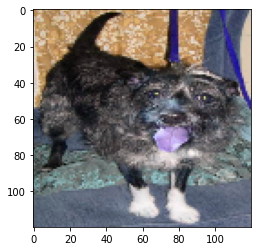

In [5]:
plt.imshow(data[112][0])

<div style='background-color: blue'><font size='3'><font color='white'><b>X=feautures</br>y=label</b></font></font></div>

In [6]:
X=[]
y=[]

In [7]:
for arr in data:
    X.append(arr[0])
    y.append(arr[1])

In [8]:
X=np.array(X)
y=np.array(y)

In [9]:
X.shape

(25000, 120, 120, 3)

In [10]:
y.shape

(25000,)

<div style='background-color: blue'><font size='3'><font color='white'><b>Normalizing the features in X</b></font></font></div>

In [11]:
X=X/255

<div style='background-color: blue'><font size='3'><font color='white'><b>train-test split</b></font></font></div>

In [12]:
X_train,X_test,y_train,y_test=X[:20000],X[20000:],y[:20000],y[20000:]

<div style='background-color: blue'><font size='5'><font color='white'><b>Convolutional neural network</b></font></font></div>

In [13]:
model=keras.Sequential()
#first convolutional layer
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(120,120,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

#second convolutional layer
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
#third convolutional layer
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(units=128,activation="relu"))

model.add(layers.Dense(units=2,activation="softmax"))

2022-12-30 14:41:44.711079: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stop])

2022-12-30 14:41:50.206438: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
625/625 [==============================] - 300s 478ms/step - loss: 0.6091 - accuracy: 0.6573 - val_loss: 0.5182 - val_accuracy: 0.7440
Epoch 2/5
625/625 [==============================] - 294s 471ms/step - loss: 0.4702 - accuracy: 0.7712 - val_loss: 0.4306 - val_accuracy: 0.8018
Epoch 3/5
625/625 [==============================] - 291s 466ms/step - loss: 0.3892 - accuracy: 0.8210 - val_loss: 0.4004 - val_accuracy: 0.8186
Epoch 4/5
625/625 [==============================] - 291s 466ms/step - loss: 0.3168 - accuracy: 0.8604 - val_loss: 0.3884 - val_accuracy: 0.8230
Epoch 5/5
625/625 [==============================] - 292s 467ms/step - loss: 0.2325 - accuracy: 0.9037 - val_loss: 0.4378 - val_accuracy: 0.8184


<div style='background-color: yellow'><font size='2.5'><font color='black'><b>Early stopping is a technique that allows you to stop training the model once the performance on the validation set starts to degrade. This can help prevent overfitting, which is when the model performs well on the training data but poorly on the test data. You can use early stopping by specifying the EarlyStopping callback when you fit the model</b></font></font></div>

<div style='background-color: blue'><font size='5'><font color='white'><b>Performance check</b></font></font></div>

In [18]:
print("Test Accuracy",model.evaluate(X_test,y_test))

157/157 [==============================] - 18s 112ms/step - loss: 0.4378 - accuracy: 0.8184
Test Accuracy [0.43784672021865845, 0.8184000253677368]


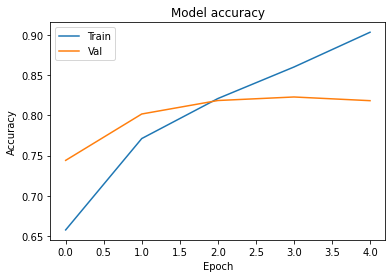

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
